# Imports

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# from matplotlib import colors as mcolors
from pathlib import Path

import os
import sys
sys.path.append('../')  # Add parent directory to the Python path

import package_DBR
import package_LAB

from importlib import reload
package_DBR = reload (package_DBR)
package_LAB = reload(package_LAB)

from package_LAB import *
from package_DBR import *

# Load Data

In [ ]:
nameFile = "Cleaned_data_Open_loop_experiment_on_MV_2024-03-11-09h21.txt"
# nameFile = "Cleaned_data_Open_loop_experiment_on_DV_2024-03-27-17h23"
# titleName = nameFile.split('.')[0]

dataFilePath = "../Data/" + nameFile
print(os.path.abspath('../Data/'))
print(os.path.abspath(dataFilePath))

data = pd.read_csv(dataFilePath)


if "MV" in nameFile :
    ExpVariable = "MV"
    tm = data['tm'].values# - data['t'].values[0]
    MVm = data['MVm'].values
    PVm = data['PVm'].values
    

else:
    ExpVariable = "DV"
    tm = data['tm'].values
    DVm = data['DVm'].values
    PVm = data['PVm'].values

print(ExpVariable)


# Approximations Methods

In [ ]:
# Méthode de la Tangente au point d'inflexion
Kp = 0.4             # Process gain (affect MV and PV)
T1 = 147.32
T2 = 17.23
theta = 5.12 

Ts = 1  # Value Imposed
TSim = len(MVm)

# ???
a = 0.2  
T_g = 1
T_u = 2




### FOPDT (Simple Broida Method)

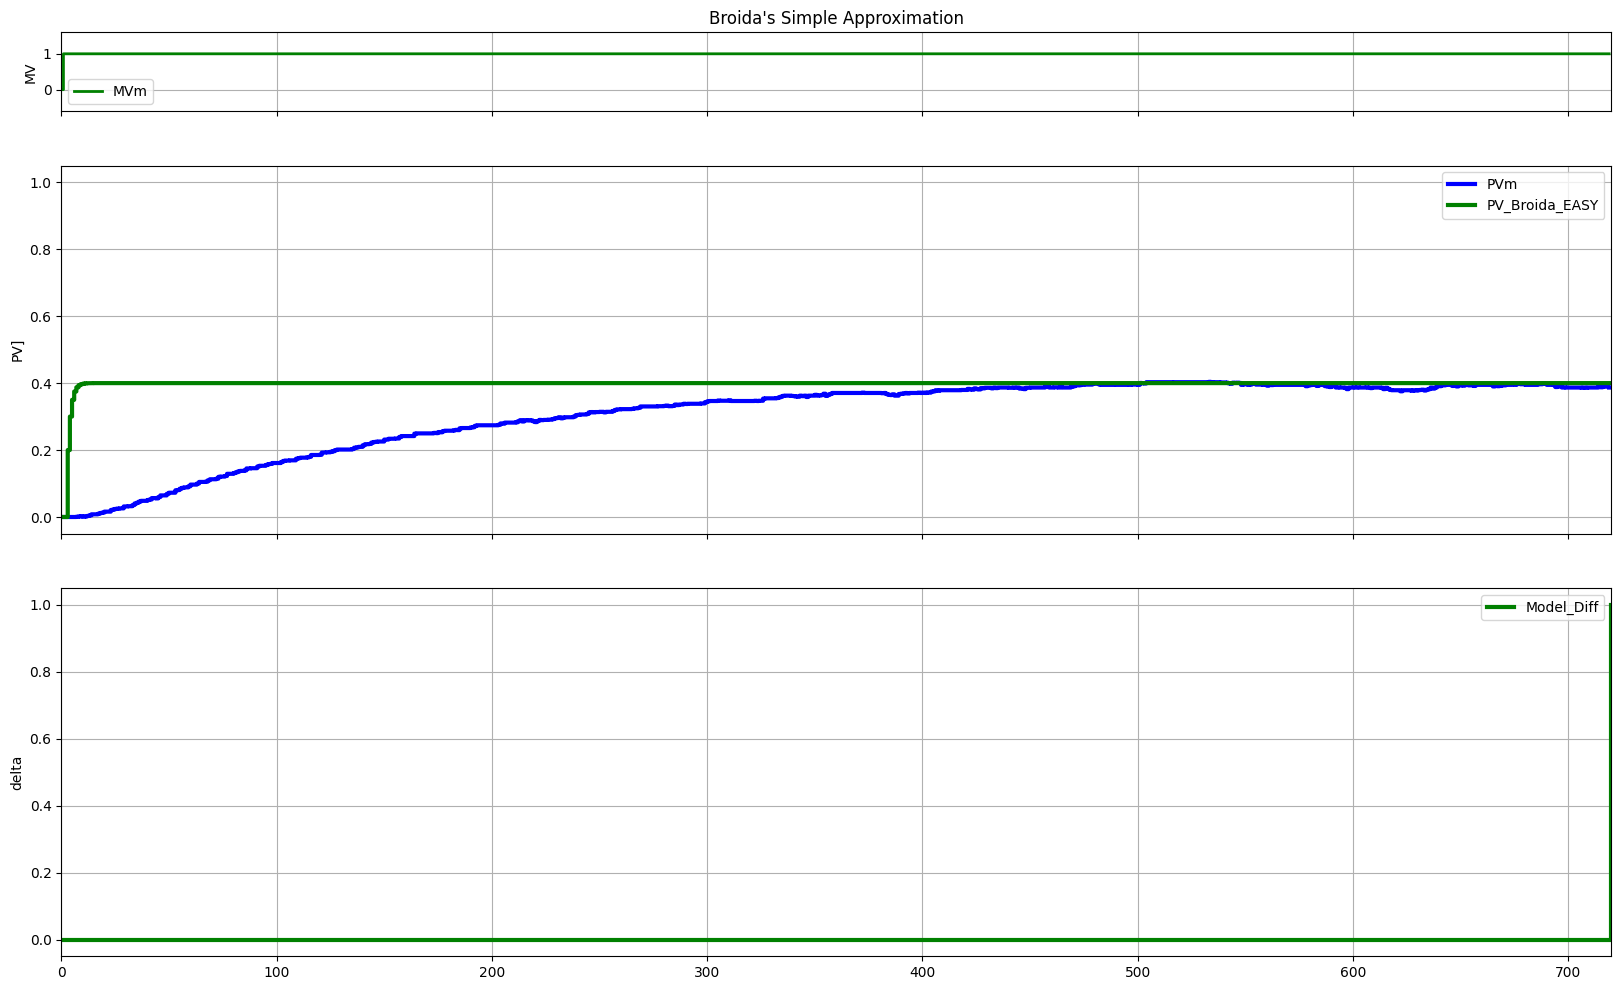

In [16]:
# T = T_g and theta = T_u
Kp_Broida_EASY = Kp
T_Broida_EASY = T_g
theta_Broida_EASY = T_u

#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Broida_EASY = FOPDT(MV=MVm, Kp=Kp_Broida_EASY, T=T_Broida_EASY, theta=theta_Broida_EASY, Ts=Ts, PVInit=0, method='EBD')


#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Broida's Simple Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 1
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_EASY', where='post') 
ax2.set_ylabel('PV]')
ax2.legend (loc='best')

#---Model_Diff
limSup = 1
limInf = 0
l4, = ax3.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Broida_EASY)

# l4.set_data(tm,MVI)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()







### FOPDT (Broida's Harder Method)

T_Broida_HARD =  -715.495
theta_Broida_HARD =  381.48199999999997


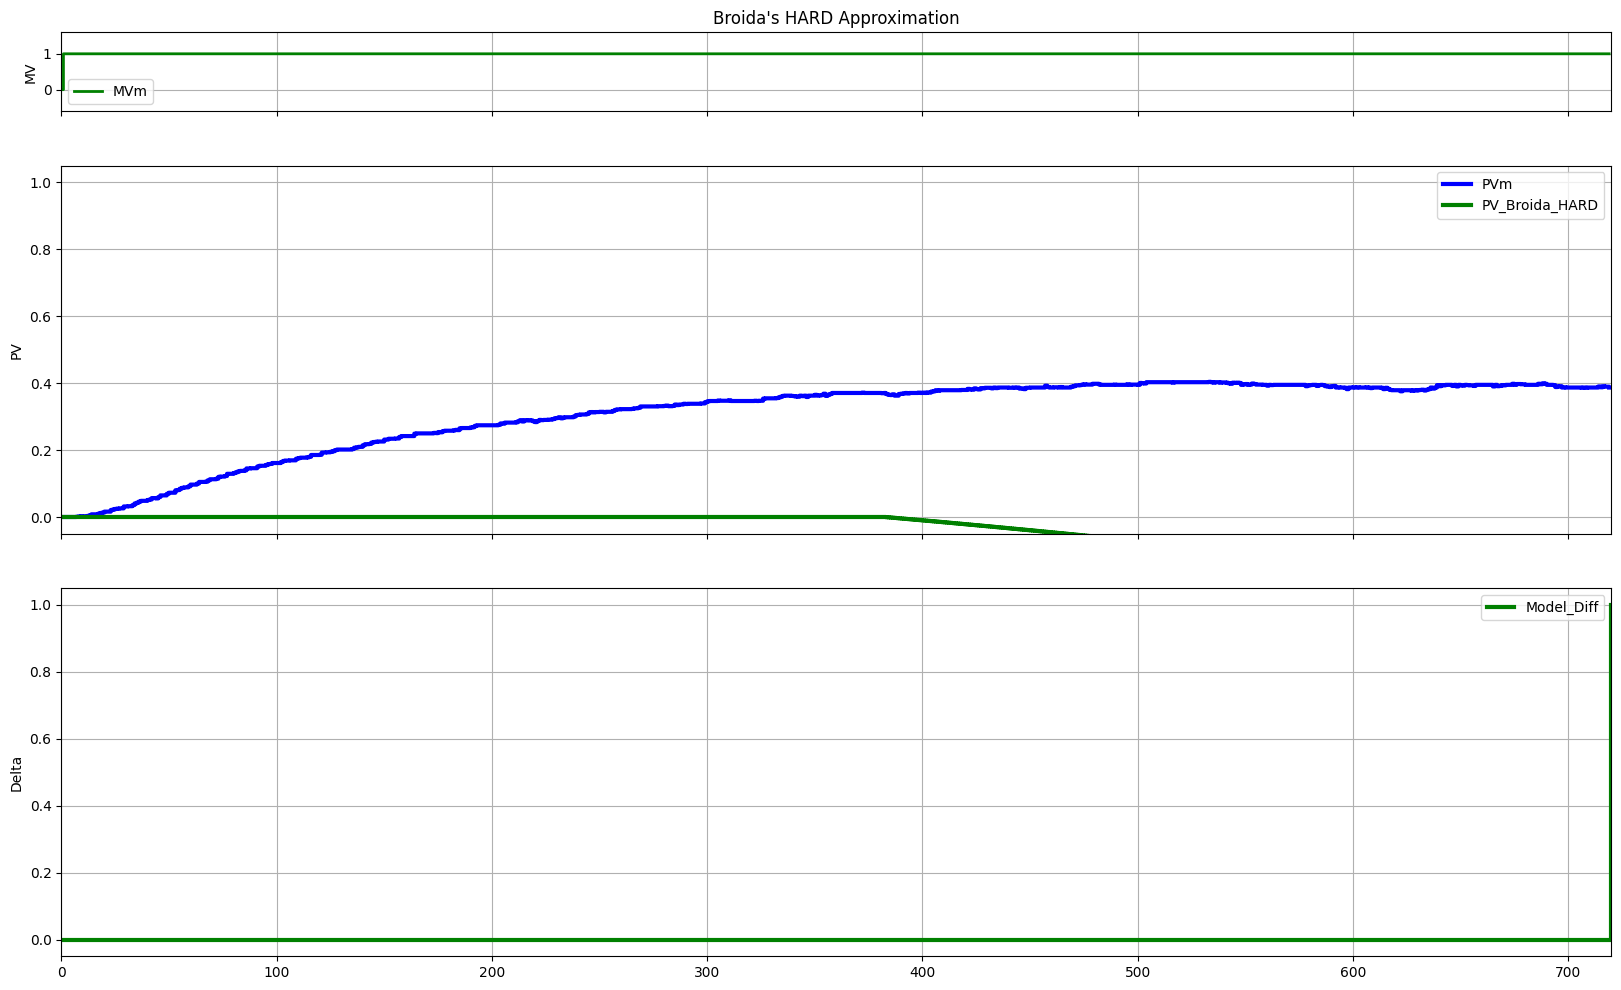

In [15]:
# T = T_g and theta = T_u
Kp_Broida_HARD = Kp
T_Broida_HARD = 5.5 * (T2 - T1)
theta_Broida_HARD = 2.8*T1 - 1.8*T2
print('T_Broida_HARD = ', T_Broida_HARD)
print('theta_Broida_HARD = ', theta_Broida_HARD)

#FOPDT(MV,Kp,T,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Broida_HARD = FOPDT(MV=MVm, Kp=Kp_Broida_HARD, T=T_Broida_HARD, theta=theta_Broida_HARD, Ts=Ts, PVInit=0, method='EBD')


#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Broida's HARD Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 1
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Broida_HARD', where='post') 
ax2.set_ylabel('PV')
ax2.legend (loc='best')

#---Model_Diff
limSup = 1
limInf = 0
l4, = ax3.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('Delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Broida_HARD)

# l4.set_data(tm,MVI)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()







### SOPDT (Van Der Grinten)

T1_Grinten =  0.40874971340700594
T2_Grinten =  0.29562514329649703
theta_Grinten =  1.9067348351307076


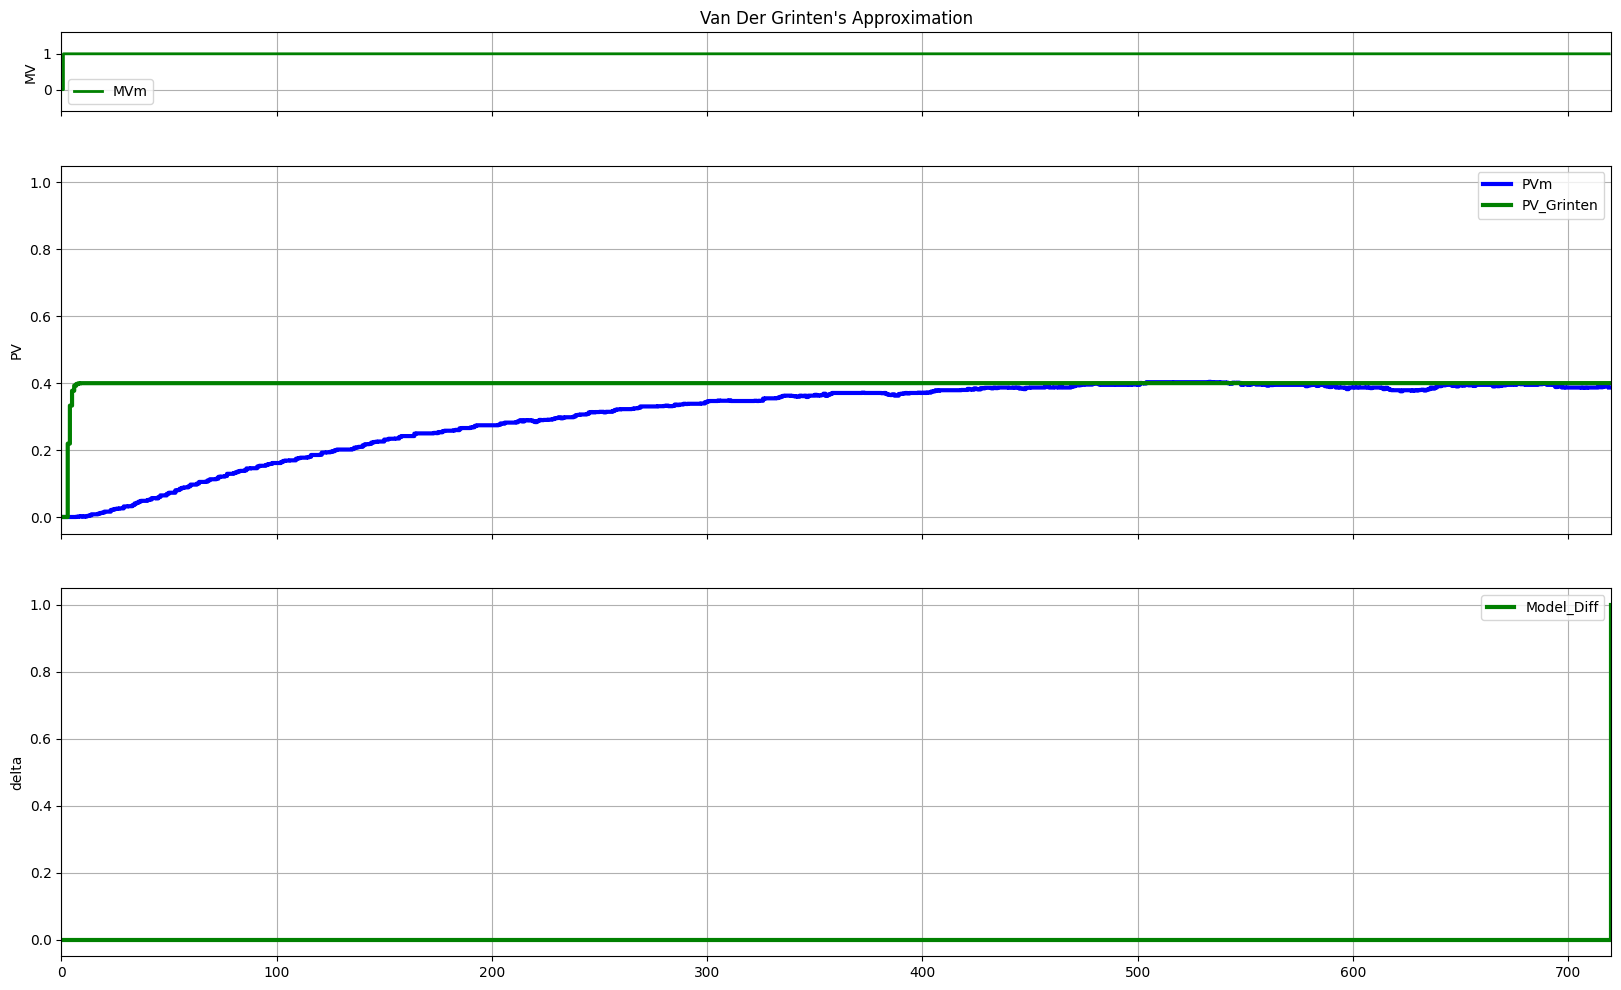

In [14]:
# Equivalent Broida + FO
Kp_Grinten =Kp
T1_Grinten = T_g * ((3*a*np.e -1)/(1+a*np.e))
T2_Grinten = T_g * ((1-a*np.e)/(1+a*np.e))
theta_Grinten = T_u - ((T1_Grinten*T2_Grinten)/(T1_Grinten+3*T2_Grinten))

print('T1_Grinten = ', T1_Grinten)
print('T2_Grinten = ', T2_Grinten)
print('theta_Grinten = ', theta_Grinten)

#SOPDT(MV,Kp,T1,T2,theta,Ts,MVInit=0,PVInit=0,method='EBD'):
PV_Grinten = SOPDT(MVm, Kp_Grinten, T1_Grinten, T2_Grinten, theta_Grinten, Ts)





#============PLOT===========================
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex='col', gridspec_kw={'height_ratios': [1.5, 7, 7]})
fig.set_figheight(12)
fig.set_figwidth(20)

ax1.set_title("Van Der Grinten's Approximation")

#--MV
limSup = 1.5
limInf = -0.5
l1, = ax1.step([0,TSim], [limInf,limSup], 'green',linewidth=2, label='MVm', where="post")
ax1.set_ylabel('MV')
ax1.legend (loc='best')

#----PV
limSup = 1
limInf = 0
l2, = ax2.step([0, TSim], [limInf,limSup], 'blue', linewidth=3, label='PVm', where='post') 
l3, = ax2.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='PV_Grinten', where='post') 
ax2.set_ylabel('PV')
ax2.legend (loc='best')

#---Model_Diff
limSup = 1
limInf = 0
l4, = ax3.step([0, TSim], [limInf,limSup], 'green', linewidth=3, label='Model_Diff', where='post') 
ax3.set_ylabel('delta')
ax3.legend (loc='best')


#-----Set Data-----
l1.set_data(tm, MVm)

l2.set_data(tm,PVm)
l3.set_data(tm, PV_Grinten)

# l4.set_data(tm,MVI)


tMax = len(tm)
ax1.set_xlim(0, tMax)
ax2.set_xlim(0, tMax)
ax3.set_xlim(0, tMax)

ax1.grid()
ax2.grid()
ax3.grid()